# Clustering
## Prepared By Md. Kamrul Islam

In [2]:
# Importing Necessary Library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# Importing Data
df = pd.read_csv("C:\\Users\\msi\\Desktop\\Programming\\Clustering\\cardiacData.csv")
df.head()

,Heart rate in beats per minute,Number of past heart attacks,Age,ST elevation (binary),death
0,84,0,55,0,0
1,76,0,80,0,0
2,50,0,80,0,0
3,60,0,44,0,0
4,106,0,77,1,0


In [4]:
# Let us drop death columns for now, as we do not need to consider death for clustering
data = df.drop("death", 1)
data.head()

,Heart rate in beats per minute,Number of past heart attacks,Age,ST elevation (binary)
0,84,0,55,0
1,76,0,80,0
2,50,0,80,0
3,60,0,44,0
4,106,0,77,1


<AxesSubplot:>

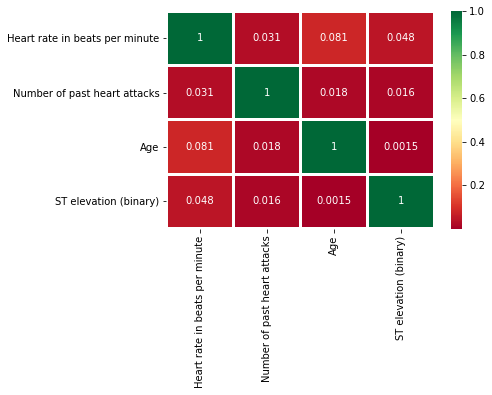

In [5]:
## Lets see correlation among data with the help of heatmap to get the perception about data
sns.heatmap(data.corr(), cmap ='RdYlGn',linewidths = 2, annot = True)

## Before moving to clustering let's decide how many cluster is optimal
### We can use eaither Elbow method or Silhouette Score; anyone of those two methods is good enough for getting right descission.  For now, I will try both method to decide optimal number of clustering


Obj. Func: 67595.87095531588
Obj. Func: 44054.630098452886
Obj. Func: 35227.223416583394
Obj. Func: 28359.760822790668
Obj. Func: 23470.602354623647
Obj. Func: 20237.476416219437
Obj. Func: 17580.02127407084
Obj. Func: 15812.449343277984
Obj. Func: 14319.26392820285


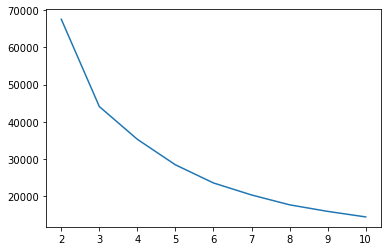

In [5]:
# Finding optimum clustering
# Method #1: Change in Obj. Func.
# Elbow rule: We can Pick the point after which the curve reaches a plateau or stops changing abruptly

clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(data.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)
plt.plot(clusterRange, objFuncs)

### Based on this graph and elbow rule, our optimum cluster should be three. Let's see Shilouette score below before deciding how many cluster should be done.

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

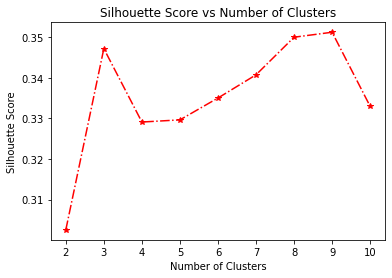

In [6]:
# Finding optimum clustering
# Method #2: Silhouette Score
# Pick Peak Coefficient
# We have to decide a cluster size that has a balance of low inertia and decent silhouette score.
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(data.values) for k in k_range]
sscores = [silhouette_score(data.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")


### The above graph suggests that optimal n_cluster can be 11, as the Silhouette score is highest at that point. However, we cannot use 11 as the number of cluster as the inertia/dissimilarity is quite high at n_cluster=11. We will set n_cluster = 3 or 8 where we have low inertia and decent silhouette score.

# Clustering
### I have decided to do three cluster of this data.Intially I will do clustering with the actual data, then will trying using normalization or standardization of the data

In [7]:
### Clustering with actual data
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data)
y_predicted

array([0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1, 2,
       1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2,
       1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 2,
       2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2,
       0, 0, 1, 0, 0, 2, 0, 1])

### We have our cluster, but for visualizing we have to convert data frame into PCA(because we have more than two dimensions in the data set).

In [8]:
# Enter PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data)

# Perform the transform
pca_trans = pca.transform(data)

pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
pca_trans_df.head()

,pca1,pca2
0,5.168327,-16.742314
1,13.317732,8.209378
2,-7.761377,23.430052
3,-20.728838,-11.610561
4,35.884890,-11.786225


In [9]:
### Adding clusters with pca dataframe
pca_trans_df['cluster']=y_predicted
pca_trans_df.head()

,pca1,pca2,cluster
0,5.168327,-16.742314,0
1,13.317732,8.209378,0
2,-7.761377,23.430052,2
3,-20.728838,-11.610561,1
4,35.884890,-11.786225,0


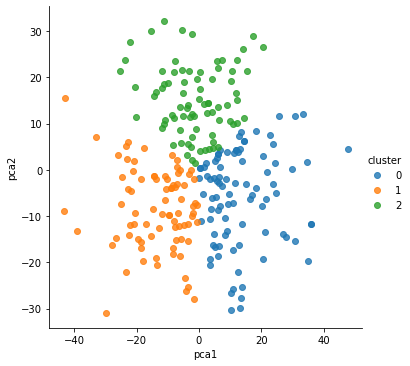

In [10]:
### Let's visualization of clusters with pca
fig = sns.lmplot(x = 'pca1', y='pca2', data=pca_trans_df, hue='cluster', fit_reg=False)
plt.show()

### Let's normalize data to see if there is better clustering of this data

In [11]:
### Normalizing data
from sklearn.preprocessing import Normalizer
cols =data.columns
normalize_data = Normalizer().fit_transform(data)
data_nrl = pd.DataFrame(normalize_data)
data_nrl.columns= cols
data_nrl.head()

,Heart rate in beats per minute,Number of past heart attacks,Age,ST elevation (binary)
0,0.836619,0.0,0.547786,0.000000
1,0.688749,0.0,0.724999,0.000000
2,0.529999,0.0,0.847998,0.000000
3,0.806405,0.0,0.591364,0.000000
4,0.809042,0.0,0.587701,0.007632


In [12]:
### Clustering with normalize data
km_nrlz = KMeans(n_clusters=3)
y_predicted_nrl = km_nrlz.fit_predict(data_nrl)
y_predicted_nrl

array([1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0,
       2, 1, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0,
       2, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0,
       1, 1, 1, 2, 2, 0, 2, 1])

In [13]:
## Adding normalized cluster in the previous clustering data frame to make a comparetive visualization of clustering, that will
## That will help us to decide which clustering is working better
pca_trans_df["cluster_nrl"] = y_predicted_nrl
pca_trans_df.head()

,pca1,pca2,cluster,cluster_nrl
0,5.168327,-16.742314,0,1
1,13.317732,8.209378,0,2
2,-7.761377,23.430052,2,0
3,-20.728838,-11.610561,1,1
4,35.884890,-11.786225,0,1


### Now, let's create scatter plot for both clusters ( with and without normalization) to compare our output.And decide which clustering is better

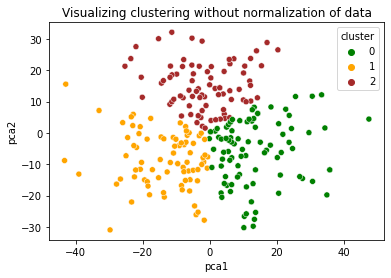

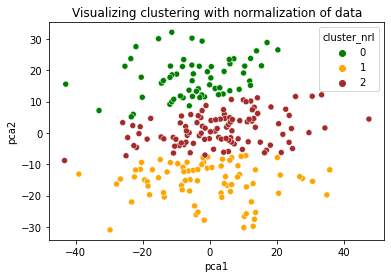

In [14]:
scatter = sns.scatterplot(x="pca1", y='pca2', data=pca_trans_df,  hue='cluster', palette=['green','orange','brown'])
plt.title('Visualizing clustering without normalization of data')
plt.show()
scatter = sns.scatterplot(x="pca1", y='pca2', data=pca_trans_df,  hue='cluster_nrl', palette=['green','orange','brown'])
plt.title('Visualizing clustering with normalization of data')
plt.show()

### Based on scatter plots above,  my opinion is that normalize data produce better clustering than without normalization.

###  Now Question is that, will Standardization of the data work better than those two above? Answer is no. I have tried clustering with standardization as well, that does not produce good clustering.Moreover, in the question I was asked to choice only one measures (normalization or standardization).Therefore, here I have used normalization only and avoided standardization.

### Finally there is a quesion, if my clustering is good one? Can my clustering be corelated with death and survival of people.To investigating relation with clustering and death, let's visualize death and survival using markers in the clustering

In [15]:
### Frist add death column of df to the clustering data frame and create plot.
pca_trans_df['death']=df["death"]
pca_trans_df = pca_trans_df .replace({'death': {0: "No", 1: "Yes"}})
pca_trans_df.head()

,pca1,pca2,cluster,cluster_nrl,death
0,5.168327,-16.742314,0,1,No
1,13.317732,8.209378,0,2,No
2,-7.761377,23.430052,2,0,No
3,-20.728838,-11.610561,1,1,No
4,35.884890,-11.786225,0,1,No


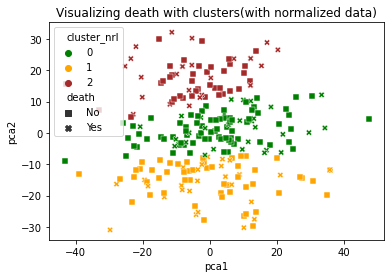

In [18]:
## I have used marker for visualizing death and survival in clustering data
pca_trans_df
markers = {"No": "s", "Yes": "X"}
scatter = sns.scatterplot(x="pca1", y='pca2', data=pca_trans_df, style="death", markers=markers, hue='cluster_nrl', palette=['green','orange','brown'])
plt.title('Visualizing death with clusters(with normalized data)')
plt.show()

### In my opinion, based on the graph above we can not relate these clusters with the death or survival. Because in the graph we see that death and servival of people dispersed over all clusters, it does not follow any trend. So, to answer if my cluster is good or not. I will say yes interms of clustering process but for finding relation with death it is not a good clustering.

### #Thanks#.